In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
class PerceptronSimple:
    """
    Implementación del algoritmo del Perceptrón Simple
    """
    def __init__(self, learning_rate=0.1, max_iterations=1000):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.weights = None
        self.bias = None
        self.errors_history = []

    def activation_function(self, x):
        """Función de activación escalón"""
        return np.where(x >= 0, 1, -1)
    
    def fit(self, X, y):
        """
        Entrena el perceptrón
        X: matriz de características
        y: vector de etiquetas (-1 o 1)
        """
        # Inicializar pesos y sesgo aleatoriamente
        n_features = X.shape[1]
        self.weights = np.random.normal(0, 0.01, n_features)
        self.bias = np.random.normal(0, 0.01)
        
        # Entrenar el perceptrón
        for iteration in range(self.max_iterations):
            errors = 0
            
            for i in range(len(X)):
                # Calcular la salida del perceptrón
                linear_output = np.dot(X[i], self.weights) + self.bias
                prediction = self.activation_function(linear_output)
                
                # Actualizar pesos si hay error
                error = y[i] - prediction
                if error != 0:
                    self.weights += self.learning_rate * error * X[i]
                    self.bias += self.learning_rate * error
                    errors += 1
            
            self.errors_history.append(errors)
            
            # Si no hay errores, el algoritmo ha convergido
            if errors == 0:
                print(f"Convergencia alcanzada en la iteración {iteration + 1}")
                break
        
        return self
    
    def predict(self, X):
        """Realizar predicciones"""
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)
    
    def get_hyperplane(self, x_range):
        """Obtener puntos del hiperplano de separación"""
        # Para 2D: w1*x1 + w2*x2 + b = 0
        # Despejando x2: x2 = -(w1*x1 + b) / w2
        if self.weights[1] != 0:
            return -(self.weights[0] * x_range + self.bias) / self.weights[1]
        else:
            return np.full_like(x_range, -self.bias / self.weights[0])

In [3]:
def load_and_prepare_data():
    """Cargar y preparar el dataset Iris"""
    # Cargar dataset Iris
    iris = load_iris()
    
    # Seleccionar solo versicolor (1) y setosa (0)
    # Usaremos las primeras dos características para visualización 2D
    mask = iris.target != 2  # Excluir virginica
    X = iris.data[mask][:, :2]  # Longitud y ancho del sépalo
    y = iris.target[mask]
    
    # Convertir etiquetas a -1 y 1
    y = np.where(y == 0, -1, 1)  # setosa: -1, versicolor: 1
    
    return X, y, iris.feature_names[:2]

def plot_results(X, y, perceptron, feature_names):
    """Visualizar resultados del entrenamiento"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Gráfico 1: Datos y hiperplano de separación
    colors = ['red' if label == -1 else 'blue' for label in y]
    labels = ['Setosa' if label == -1 else 'Versicolor' for label in y]
    
    scatter = ax1.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.7, s=100, edgecolors='black')
    
    # Dibujar hiperplano
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x_range = np.linspace(x_min, x_max, 100)
    y_hyperplane = perceptron.get_hyperplane(x_range)
    
    ax1.plot(x_range, y_hyperplane, 'g-', linewidth=3, label='Hiperplano de separación')
    ax1.set_xlabel(feature_names[0])
    ax1.set_ylabel(feature_names[1])
    ax1.set_title('Perceptrón Simple - Separación de Especies')
    ax1.grid(True, alpha=0.3)
    ax1.legend(['Hiperplano', 'Setosa', 'Versicolor'])
    
    # Gráfico 2: Historial de errores
    ax2.plot(range(len(perceptron.errors_history)), perceptron.errors_history, 'b-', linewidth=2)
    ax2.set_xlabel('Iteración')
    ax2.set_ylabel('Número de errores')
    ax2.set_title('Convergencia del Perceptrón')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def evaluate_model(X, y, perceptron):
    """Evaluar el rendimiento del modelo"""
    predictions = perceptron.predict(X)
    accuracy = np.mean(predictions == y)
    
    print(f"\n=== RESULTADOS DEL ENTRENAMIENTO ===")
    print(f"Precisión: {accuracy:.2%}")
    print(f"Pesos finales: {perceptron.weights}")
    print(f"Sesgo final: {perceptron.bias:.4f}")
    print(f"Ecuación del hiperplano: {perceptron.weights[0]:.4f}*x1 + {perceptron.weights[1]:.4f}*x2 + {perceptron.bias:.4f} = 0")
    
    # Matriz de confusión simple
    setosa_correct = np.sum((y == -1) & (predictions == -1))
    setosa_total = np.sum(y == -1)
    versicolor_correct = np.sum((y == 1) & (predictions == 1))
    versicolor_total = np.sum(y == 1)
    
    print(f"\nMatriz de confusión:")
    print(f"Setosa: {setosa_correct}/{setosa_total} correctas")
    print(f"Versicolor: {versicolor_correct}/{versicolor_total} correctas")

=== PERCEPTRÓN SIMPLE PARA DATASET IRIS ===

Dataset cargado: 100 muestras
Características: ['sepal length (cm)', 'sepal width (cm)']
Distribución de clases: Setosa=50, Versicolor=50

Entrenando perceptrón...
Convergencia alcanzada en la iteración 4

=== RESULTADOS DEL ENTRENAMIENTO ===
Precisión: 100.00%
Pesos finales: [ 0.65023794 -0.33979538]
Sesgo final: 0.1902
Ecuación del hiperplano: 0.6502*x1 + -0.3398*x2 + 0.1902 = 0

Matriz de confusión:
Setosa: 50/50 correctas
Versicolor: 50/50 correctas


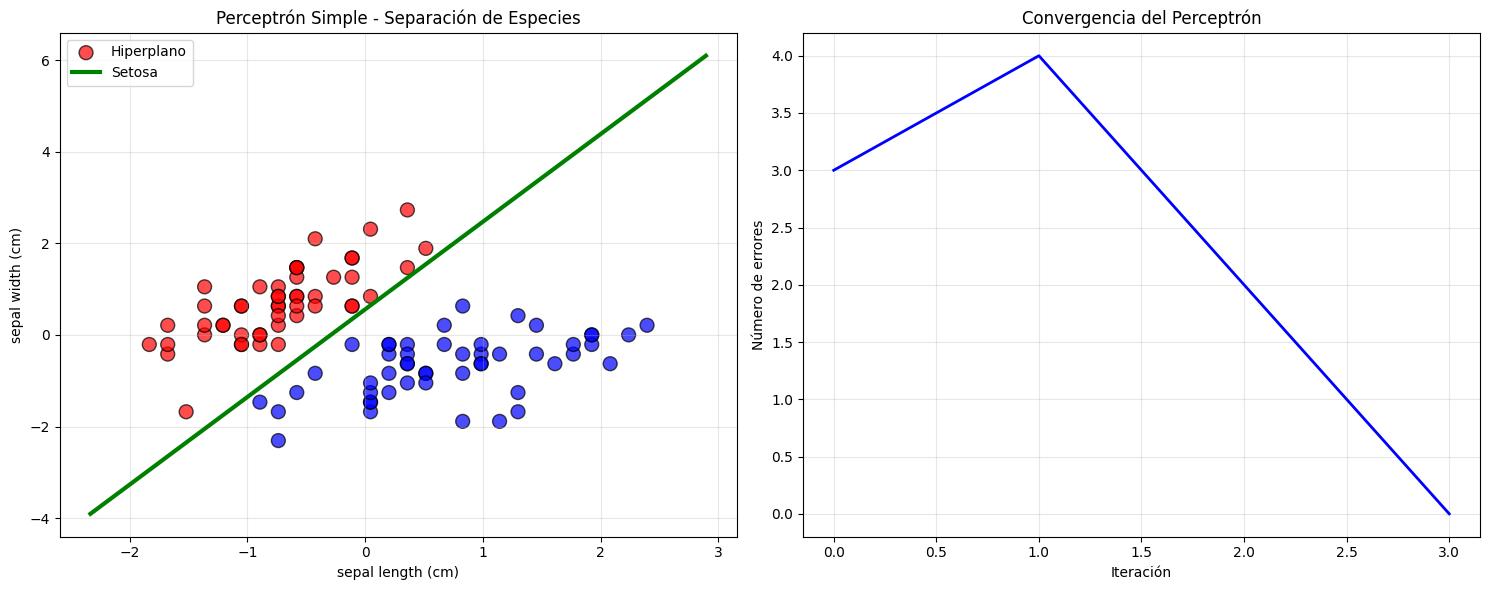


=== EJEMPLO DE PREDICCIÓN ===
Muestra: [5. 3.]
Predicción: Setosa (valor: -1)
Real: Setosa (valor: -1)
¿Correcto? Sí


In [4]:
"""Función principal"""
print("=== PERCEPTRÓN SIMPLE PARA DATASET IRIS ===\n")

# Cargar y preparar datos
X, y, feature_names = load_and_prepare_data()
print(f"Dataset cargado: {len(X)} muestras")
print(f"Características: {feature_names}")
print(f"Distribución de clases: Setosa={np.sum(y==-1)}, Versicolor={np.sum(y==1)}\n")

# Normalizar datos (opcional pero recomendado)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear y entrenar el perceptrón
perceptron = PerceptronSimple(learning_rate=0.1, max_iterations=1000)
print("Entrenando perceptrón...")
perceptron.fit(X_scaled, y)

# Evaluar modelo
evaluate_model(X_scaled, y, perceptron)

# Visualizar resultados
plot_results(X_scaled, y, perceptron, feature_names)

# Ejemplo de predicción
print(f"\n=== EJEMPLO DE PREDICCIÓN ===")
sample_idx = 25
sample = X_scaled[sample_idx:sample_idx+1]
prediction = perceptron.predict(sample)[0]
actual = y[sample_idx]

species_pred = "Setosa" if prediction == -1 else "Versicolor"
species_actual = "Setosa" if actual == -1 else "Versicolor"

print(f"Muestra: {X[sample_idx]}")
print(f"Predicción: {species_pred} (valor: {prediction})")
print(f"Real: {species_actual} (valor: {actual})")
print(f"¿Correcto? {'Sí' if prediction == actual else 'No'}")